In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#import AAPL csv, csv data is different from yahoo finance
csv_AAPL = pd.read_csv('../../data/individual_tickers/AAPL_historic.csv')

#since date type is just a object convert it to a datetime object
csv_AAPL['Date'] = pd.to_datetime(csv_AAPL['Date'])

#declare the features
features = ['Close','High','Low','Open','Volume']

#declare the type of scalar you're using
scaler = StandardScaler()
csv_AAPL[features] = scaler.fit_transform(csv_AAPL[features])

#drop unneeded values and then create a new csv
# drops Date (or any other non‑numeric columns) if you haven’t already
df_model = csv_AAPL.drop(columns=['Date'])

# save
df_model.to_csv('../../data/individual_tickers/scaled_data.csv', index=False)
print("Saved cleaned & scaled data to scaled_data.csv")

Saved cleaned & scaled data to scaled_data.csv


Iteration 1, loss = 0.45431411
Iteration 2, loss = 0.21578311
Iteration 3, loss = 0.07688085
Iteration 4, loss = 0.02189001
Iteration 5, loss = 0.00881596
Iteration 6, loss = 0.00529322
Iteration 7, loss = 0.00622610
Iteration 8, loss = 0.00257499
Iteration 9, loss = 0.00175718
Iteration 10, loss = 0.00160283
Iteration 11, loss = 0.00135168
Iteration 12, loss = 0.00102181
Iteration 13, loss = 0.00095480
Iteration 14, loss = 0.00085780
Iteration 15, loss = 0.00079266
Iteration 16, loss = 0.00074394
Iteration 17, loss = 0.00070200
Iteration 18, loss = 0.00065639
Iteration 19, loss = 0.00062609
Iteration 20, loss = 0.00060104
Iteration 21, loss = 0.00055966
Iteration 22, loss = 0.00052002
Iteration 23, loss = 0.00051642
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Test MSE: 0.0055
Test R²:  0.9625


<Axes: >

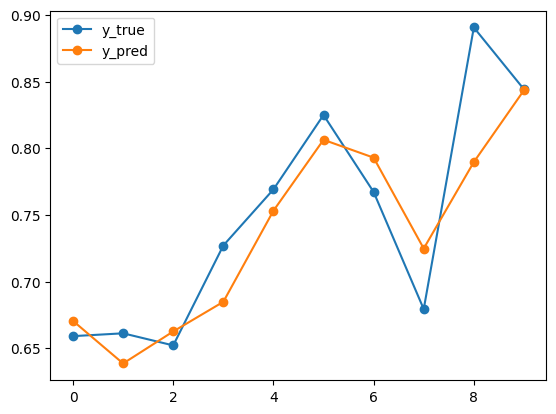

In [10]:
#This cell is for ur model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

#prep features and drop unneeded data
X = df_model.drop(columns=['Close'])
y = df_model['Close']

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, shuffle=False,random_state=42)

#instantiate and fit MLP
mlp_model = MLPRegressor(hidden_layer_sizes=(64,64),activation='relu',solver='adam',
                         learning_rate_init=1e-3,max_iter=200,random_state=42,verbose=True)

mlp_model.fit(X_train,y_train)

#evaluate the model
y_pred = mlp_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test R²:  {r2:.4f}")

#predictions vs actual
pd.DataFrame({
    'y_true': y_test.values[:10],
    'y_pred': y_pred[:10],
}).plot(marker='o')
